In [1]:
#I used public data available from the StockX Data Contest, which provided me with a dataset 
#of 99,956 transactions that occurred between 2017 and 2019. This dataset included two prominent 
#brands, Yeezy and Nike Off-White, as well as over 50 different sneaker styles.

#In an effort to enhance the dataset, I manually gathered information on colorways and the number of sales from 
#the StockX website. Subsequently, I converted style and color information into dummy variables. 

#For my modeling purposes, The "price premium" is calculated as the difference between the sale price of a 
#product (in this case, sneakers) and its original retail price. It represents how much more (or less) a 
#customer is willing to pay for a product compared to its original retail price. In other words, it quantifies 
#the additional amount that buyers are willing to spend, or the markup, above the standard retail cost for a 
#particular product.

#The input variables for my analysis included the number of days since  release, sneaker style, colorway, 
#shoe size, and the number of sales. These variables allowed me to develop models and gain insights into 
#the factors influencing sneaker prices in this market.

In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import datetime
from datetime import date
import matplotlib.pyplot as plt
stockx_data = pd.read_excel("./StockX-Data-Contest-2019.xlsx",sheet_name="Raw Data")

In [3]:
stockx_data

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220,2016-09-24,11.0,California
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220,2016-11-23,11.0,California
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220,2016-11-23,11.0,California
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220,2016-11-23,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220,2017-02-11,11.0,Rhode Island
...,...,...,...,...,...,...,...,...
99951,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,565.0,220,2018-12-26,8.0,Oregon
99952,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,598.0,220,2018-12-26,8.5,California
99953,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,605.0,220,2018-12-26,5.5,New York
99954,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,650.0,220,2018-12-26,11.0,California


In [4]:
stockx_data['Sneaker Name'].value_counts()

adidas-Yeezy-Boost-350-V2-Butter                     11423
Adidas-Yeezy-Boost-350-V2-Beluga-2pt0                10395
Adidas-Yeezy-Boost-350-V2-Zebra                      10110
Adidas-Yeezy-Boost-350-V2-Blue-Tint                   9297
Adidas-Yeezy-Boost-350-V2-Cream-White                 9097
Adidas-Yeezy-Boost-350-V2-Sesame                      5553
adidas-Yeezy-Boost-350-V2-Static                      4983
Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow          4854
Air-Jordan-1-Retro-High-Off-White-University-Blue     4635
adidas-Yeezy-Boost-350-V2-Static-Reflective           3184
Nike-Air-Presto-Off-White-Black-2018                  1884
Nike-Air-Presto-Off-White-White-2018                  1883
Nike-Air-VaporMax-Off-White-2018                      1591
Nike-Blazer-Mid-Off-White-All-Hallows-Eve             1435
Nike-Blazer-Mid-Off-White-Grim-Reaper                 1398
Nike-Zoom-Fly-Off-White-Pink                          1359
Nike-Air-VaporMax-Off-White-Black                     13

In [5]:
stockx_data['Buyer Region'].value_counts()

California              19349
New York                16525
Oregon                   7681
Florida                  6376
Texas                    5876
New Jersey               4720
Illinois                 3782
Pennsylvania             3109
Massachusetts            2903
Michigan                 2762
Virginia                 2058
Ohio                     1890
Maryland                 1870
Washington               1863
Georgia                  1846
Arizona                  1398
North Carolina           1344
Delaware                 1242
Connecticut              1110
Indiana                  1026
Colorado                  954
Wisconsin                 840
Nevada                    790
Tennessee                 731
Minnesota                 725
Missouri                  660
South Carolina            570
Louisiana                 537
Kentucky                  488
Iowa                      460
Alabama                   457
Utah                      450
Oklahoma                  412
Hawaii    

In [6]:
color = pd.read_excel("./supplemental_data_colorway.xlsx",sheet_name="Sheet1")

In [7]:
color.head

<bound method NDFrame.head of                                                 Style  Black  White  Grey  \
0                Adidas-Yeezy-Boost-350-Low-V2-Beluga    NaN    NaN   1.0   
1         Adidas-Yeezy-Boost-350-V2-Core-Black-Copper    1.0    NaN   NaN   
2          Adidas-Yeezy-Boost-350-V2-Core-Black-Green    1.0    NaN   NaN   
3            Adidas-Yeezy-Boost-350-V2-Core-Black-Red    1.0    NaN   NaN   
4       Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017    1.0    NaN   NaN   
5          Adidas-Yeezy-Boost-350-V2-Core-Black-White    1.0    1.0   NaN   
6               Adidas-Yeezy-Boost-350-V2-Cream-White    NaN    1.0   NaN   
7                     Adidas-Yeezy-Boost-350-V2-Zebra    1.0    1.0   NaN   
8                 Adidas-Yeezy-Boost-350-Low-Moonrock    NaN    NaN   1.0   
9                           Nike-Air-Max-90-Off-White    NaN    1.0   NaN   
10                          Nike-Air-Presto-Off-White    1.0    1.0   NaN   
11                        Nike-Air-VaporMax-Of

In [8]:
# --- Data Cleaning ---
# calculate price premium: (sale price - retail price)/retail price
stockx_data["Price_Percentage_change"] = (stockx_data['Sale Price'] - stockx_data['Retail Price'])/stockx_data['Retail Price']

# calculate days since release: order data - release date
stockx_data["Days_Since_Release"] = (pd.to_datetime(stockx_data['Order Date']) - pd.to_datetime(stockx_data['Release Date']))/np.timedelta64('1','D')

# --- style variables ---
# style: v2
stockx_data["yeezy"] = stockx_data['Sneaker Name'].apply(lambda x : 1 if 'Yeezy' in x.split("-") else 0)
# style: airjordan
stockx_data["airjordan"] = stockx_data['Sneaker Name'].apply(lambda x : 1 if 'Jordan' in x.split("-") else 0)
# style: airforce
stockx_data["airforce"] = stockx_data['Sneaker Name'].apply(lambda x : 1 if 'Force' in x.split("-") else 0)
# style: airmax90
stockx_data["airmax90"] = stockx_data['Sneaker Name'].apply(lambda x : 1 if '90' in x.split("-") else 0)
# style: airmax97
stockx_data["airmax97"] = stockx_data['Sneaker Name'].apply(lambda x : 1 if '97' in x.split("-") else 0)
# style: presto
stockx_data["presto"] = stockx_data['Sneaker Name'].apply(lambda x : 1 if 'Presto' in x.split("-") else 0)
# style: vapormax
stockx_data["vapormax"] = stockx_data['Sneaker Name'].apply(lambda x : 1 if 'VaporMax' in x.split("-") else 0)
# style: blazer
stockx_data["blazer"] = stockx_data['Sneaker Name'].apply(lambda x : 1 if 'Blazer' in x.split("-") else 0)
# style: zoom
stockx_data["zoom"] = stockx_data['Sneaker Name'].apply(lambda x : 1 if 'Zoom' in x.split("-") else 0)
# style: zoom
stockx_data["react"] = stockx_data['Sneaker Name'].apply(lambda x : 1 if 'React' in x.split("-") else 0)

# --- state variables ---
# creating the california variable
stockx_data["California"] = stockx_data["Buyer Region"].apply(lambda x : 1 if 'California' in x else 0)
# creating the new_york variable
stockx_data["New York"] = stockx_data["Buyer Region"].apply(lambda x : 1 if 'New York' in x else 0)
# creating the oregon variable
stockx_data["Oregon"] = stockx_data["Buyer Region"].apply(lambda x : 1 if 'Oregon' in x else 0)
# creating the florida variable
stockx_data["Florida"] = stockx_data["Buyer Region"].apply(lambda x : 1 if 'Florida' in x else 0)
# creating the texas variable
stockx_data["Texas"] = stockx_data["Buyer Region"].apply(lambda x : 1 if 'Texas' in x else 0)
# creating the other_state variable
above5pct_states = ["California", "New York", "Oregon", "Florida", "Texas"]
stockx_data["Other States"] = pd.Series(list(map(int,~stockx_data["Buyer Region"].isin(above5pct_states))))


In [9]:
stockx_data

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Price_Percentage_change,Days_Since_Release,...,vapormax,blazer,zoom,react,California,New York,Oregon,Florida,Texas,Other States
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220,2016-09-24,11.0,California,3.986364,342.0,...,0,0,0,0,1,0,0,0,0,0
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220,2016-11-23,11.0,California,2.113636,282.0,...,0,0,0,0,1,0,0,0,0,0
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220,2016-11-23,11.0,California,2.136364,282.0,...,0,0,0,0,1,0,0,0,0,0
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220,2016-11-23,11.5,Kentucky,3.886364,282.0,...,0,0,0,0,0,0,0,0,0,1
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220,2017-02-11,11.0,Rhode Island,2.763636,202.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99951,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,565.0,220,2018-12-26,8.0,Oregon,1.568182,49.0,...,0,0,0,0,0,0,1,0,0,0
99952,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,598.0,220,2018-12-26,8.5,California,1.718182,49.0,...,0,0,0,0,1,0,0,0,0,0
99953,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,605.0,220,2018-12-26,5.5,New York,1.750000,49.0,...,0,0,0,0,0,1,0,0,0,0
99954,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,650.0,220,2018-12-26,11.0,California,1.954545,49.0,...,0,0,0,0,1,0,0,0,0,0


In [10]:
stockx_data = stockx_data.merge(color, left_on = 'Sneaker Name', right_on = 'Style', how = 'left')

In [11]:
stockx_data

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Price_Percentage_change,Days_Since_Release,...,Green,Neo,Orange,Tan/Brown,Pink,Blue,Colorful,Number of Sales,Website,Product Line
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220,2016-09-24,11.0,California,3.986364,342.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1857.0,https://stockx.com/adidas-yeezy-boost-350-v2-s...,Adidas Yeezy
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220,2016-11-23,11.0,California,2.113636,282.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,560.0,https://stockx.com/adidas-yeezy-boost-350-v2-c...,Adidas Yeezy
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220,2016-11-23,11.0,California,2.136364,282.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,520.0,https://stockx.com/adidas-yeezy-boost-350-v2-c...,Adidas Yeezy
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220,2016-11-23,11.5,Kentucky,3.886364,282.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,808.0,https://stockx.com/adidas-yeezy-boost-350-v2-c...,Adidas Yeezy
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220,2017-02-11,11.0,Rhode Island,2.763636,202.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2153.0,https://stockx.com/adidas-yeezy-boost-350-v2-c...,Adidas Yeezy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99951,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,565.0,220,2018-12-26,8.0,Oregon,1.568182,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6085.0,https://stockx.com/adidas-yeezy-boost-350-v2-s...,Adidas Yeezy
99952,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,598.0,220,2018-12-26,8.5,California,1.718182,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6085.0,https://stockx.com/adidas-yeezy-boost-350-v2-s...,Adidas Yeezy
99953,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,605.0,220,2018-12-26,5.5,New York,1.750000,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6085.0,https://stockx.com/adidas-yeezy-boost-350-v2-s...,Adidas Yeezy
99954,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,650.0,220,2018-12-26,11.0,California,1.954545,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6085.0,https://stockx.com/adidas-yeezy-boost-350-v2-s...,Adidas Yeezy


In [12]:
stockx_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99956 entries, 0 to 99955
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Order Date               99956 non-null  datetime64[ns]
 1   Brand                    99956 non-null  object        
 2   Sneaker Name             99956 non-null  object        
 3   Sale Price               99956 non-null  float64       
 4   Retail Price             99956 non-null  int64         
 5   Release Date             99956 non-null  datetime64[ns]
 6   Shoe Size                99956 non-null  float64       
 7   Buyer Region             99956 non-null  object        
 8   Price_Percentage_change  99956 non-null  float64       
 9   Days_Since_Release       99956 non-null  float64       
 10  yeezy                    99956 non-null  int64         
 11  airjordan                99956 non-null  int64         
 12  airforce                 99956 n

In [13]:
# drop columns that have been coded
# keep retail and sales prices for further analysis
# stockx_data = stockx_data.drop(columns = ['Retail Price','Order Date', 'Brand','Sneaker Name', 'Release Date', 'Buyer Region',
#                                          'Website', 'Product Line', 'Style','weeknum', 'Nike Air Force', 'Adidas Yeezy', 
#                                           'Nike Air Max', 'Nike Zoom','Nike Air VaporMax', 'Nike Blazers', 'Air Jordan', 
#                                           'Nike React','Nike Presto'])
stockx_data = stockx_data.drop(columns = ['Order Date', 'Brand','Sneaker Name', 'Release Date', 'Buyer Region',
                                         'Website', 'Product Line', 'Style'])

In [14]:
stockx_data

,Sale Price,Retail Price,Shoe Size,Price_Percentage_change,Days_Since_Release,yeezy,airjordan,airforce,airmax90,airmax97,...,Grey,Red,Green,Neo,Orange,Tan/Brown,Pink,Blue,Colorful,Number of Sales
0,1097.0,220,11.0,3.986364,342.0,1,0,0,0,0,...,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1857.0
1,685.0,220,11.0,2.113636,282.0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,560.0
2,690.0,220,11.0,2.136364,282.0,1,0,0,0,0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,520.0
3,1075.0,220,11.5,3.886364,282.0,1,0,0,0,0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,808.0
4,828.0,220,11.0,2.763636,202.0,1,0,0,0,0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2153.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99951,565.0,220,8.0,1.568182,49.0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6085.0
99952,598.0,220,8.5,1.718182,49.0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6085.0
99953,605.0,220,5.5,1.750000,49.0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6085.0
99954,650.0,220,11.0,1.954545,49.0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6085.0


In [15]:
# turn all the nan value to the 0
stockx_data = stockx_data.fillna(0)

In [16]:
stockx_data

,Sale Price,Retail Price,Shoe Size,Price_Percentage_change,Days_Since_Release,yeezy,airjordan,airforce,airmax90,airmax97,...,Grey,Red,Green,Neo,Orange,Tan/Brown,Pink,Blue,Colorful,Number of Sales
0,1097.0,220,11.0,3.986364,342.0,1,0,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1857.0
1,685.0,220,11.0,2.113636,282.0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,560.0
2,690.0,220,11.0,2.136364,282.0,1,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,520.0
3,1075.0,220,11.5,3.886364,282.0,1,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,808.0
4,828.0,220,11.0,2.763636,202.0,1,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2153.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99951,565.0,220,8.0,1.568182,49.0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6085.0
99952,598.0,220,8.5,1.718182,49.0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6085.0
99953,605.0,220,5.5,1.750000,49.0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6085.0
99954,650.0,220,11.0,1.954545,49.0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6085.0


In [17]:
stockx_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99956 entries, 0 to 99955
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sale Price               99956 non-null  float64
 1   Retail Price             99956 non-null  int64  
 2   Shoe Size                99956 non-null  float64
 3   Price_Percentage_change  99956 non-null  float64
 4   Days_Since_Release       99956 non-null  float64
 5   yeezy                    99956 non-null  int64  
 6   airjordan                99956 non-null  int64  
 7   airforce                 99956 non-null  int64  
 8   airmax90                 99956 non-null  int64  
 9   airmax97                 99956 non-null  int64  
 10  presto                   99956 non-null  int64  
 11  vapormax                 99956 non-null  int64  
 12  blazer                   99956 non-null  int64  
 13  zoom                     99956 non-null  int64  
 14  react                 

#### Linear Regression and Comparison to Regularized Models

In [18]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
y = stockx_data["Price_Percentage_change"]
X = sm.add_constant(stockx_data.drop(["Sale Price",'Price_Percentage_change', "Other States", "New York", "Texas"], axis = 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=808)

In [19]:
import statsmodels.api as sm

LinReg = sm.OLS(y_train,X_train)
results = LinReg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Price_Percentage_change   R-squared:                       0.787
Model:                                 OLS   Adj. R-squared:                  0.787
Method:                      Least Squares   F-statistic:                     9178.
Date:                     Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                             10:24:27   Log-Likelihood:                -70786.
No. Observations:                    66970   AIC:                         1.416e+05
Df Residuals:                        66942   BIC:                         1.419e+05
Df Model:                               27                                         
Covariance Type:                 nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  9.4030      0.162     57.907      0.000       9.085       9.721
Retail Price          -0.0500      0.001    -51.322      0.000      -0.052      -0.048
Shoe Size              0.0106      0.001      8.990      0.000       0.008       0.013
Days_Since_Release     0.0004   2.05e-05     20.529      0.000       0.000       0.000
yeezy                  0.9012      0.050     17.989      0.000       0.803       0.999
airjordan              5.2076      0.033    157.582      0.000       5.143       5.272
airforce              -0.6430      0.019    -34.034      0.000      -0.680      -0.606
airmax90              -0.2426      0.030     -8.178      0.000      -0.301      -0.184
airmax97               1.4560      0.031     46.241      0.000       1.394       1.518
presto                 0.7585      0.016     46.768      0.000       0.727       0.790
vapormax               3.0240      0.081     37.347      0.000       2.865       3.183
blazer                -0.5795      0.042    -13.881      0.000      -0.661      -0.498
zoom                  -0.9918      0.019    -51.358      0.000      -1.030      -0.954
react                  0.5125      0.048     10.769      0.000       0.419       0.606
California             0.0598      0.007      8.574      0.000       0.046       0.073
Oregon                 0.0188      0.011      1.776      0.076      -0.002       0.040
Florida                0.0278      0.011      2.489      0.013       0.006       0.050
Black                  1.2057      0.016     75.504      0.000       1.174       1.237
White                  1.4191      0.016     87.122      0.000       1.387       1.451
Grey                   1.0123      0.017     58.760      0.000       0.979       1.046
Red                    2.1219      0.024     86.971      0.000       2.074       2.170
Green                  1.0061      0.063     16.053      0.000       0.883       1.129
Neo                    0.9287      0.019     48.910      0.000       0.891       0.966
Orange                 1.8837      0.028     67.790      0.000       1.829       1.938
Tan/Brown              2.4041      0.042     57.525      0.000       2.322       2.486
Pink                   1.0070      0.028     36.468      0.000       0.953       1.061
Blue                  -2.1584      0.028    -77.782      0.000      -2.213      -2.104
Colorful              -0.7474      0.015    -49.691      0.000      -0.777      -0.718
Number of Sales    -2.482e-05   4.76e-07    -52.095      0.000   -2.58e-05   -2.39e-05
==============================================================================
Omnibus:                    44627.493   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1438998.696
Skew:  

In [20]:
#Normal Linear Regression
y_pred = results.predict(X_test)

RSS = np.sum((y_test - y_pred)**2)
SST = np.sum((y_test - np.mean(y_train))**2)
OSR2 = 1- RSS/SST
print(OSR2)
from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(y_pred,y_test))
RMSE

0.7924144323328781


0.6861439687082254

In [21]:
#Lasso Regularization
LinRegreg = sm.OLS(y_train,X_train)
results1 = LinRegreg.fit_regularized(L1_wt=1.0)
y_pred1 = results1.predict(X_test)

RSS = np.sum((y_test - y_pred1)**2)
SST = np.sum((y_test - np.mean(y_train))**2)
OSR2 = 1- RSS/SST
OSR2

0.7811606808274492

In [22]:
#Ridge Regularization
LinRegreg = sm.OLS(y_train,X_train)
results1 = LinRegreg.fit_regularized(L1_wt=0.0)
y_pred2 = results1.predict(X_test)

RSS = np.sum((y_test - y_pred2)**2)
SST = np.sum((y_test - np.mean(y_train))**2)
OSR2 = 1- RSS/SST
OSR2

0.7924144327109639

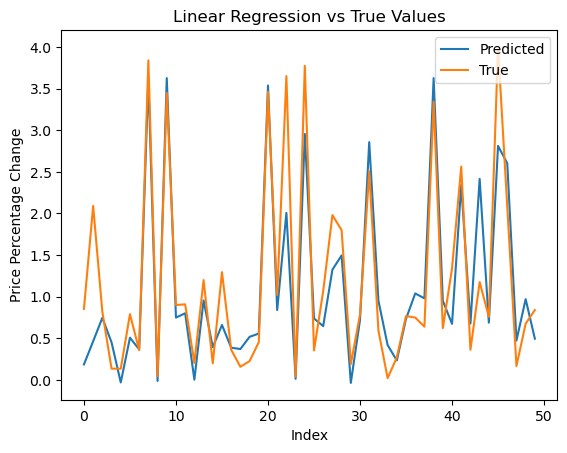

In [37]:
plt.plot(y_pred[0:50].reset_index().drop("index", axis=1),label = "Predicted")
plt.plot(y_test[0:50].reset_index().drop("index", axis=1), label = "True")
plt.title("Linear Regression vs True Values")
plt.xlabel("Index")
plt.ylabel("Price Percentage Change")
plt.legend()